In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import missingno as msno
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from xgboost import XGBRegressor
%matplotlib inline

In [2]:
train = pd.read_csv("data/pre_train.csv", encoding='utf-8', sep=',')

test = pd.read_csv("data/pre_test.csv", encoding='utf-8', sep=',')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,1,3,3,0,...,120,0,2,2,1,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,1,0,3,0,...,0,0,2,4,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,1,0,3,0,...,0,0,2,2,1,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,1,0,3,0,...,0,0,2,4,1,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,1,0,1,0,...,144,0,2,4,1,0,1,2010,8,4


In [5]:
cat_col = ['MSSubClass',
          'MSZoning',
          'Street',
          'Alley',
          'LotShape',
          'LandContour',
          'Utilities',
          'LotConfig',
          'LandSlope',
          'Neighborhood',
          'Condition1',
          'Condition2',
          'BldgType',
          'HouseStyle',
          'OverallQual',
          'OverallCond',
          'RoofStyle',
          'RoofMatl',
          'Exterior1st',
          'Exterior2nd',
          'MasVnrType',
          'ExterQual',
          'ExterCond',
          'Foundation',
          'BsmtQual',
          'BsmtCond',
          'BsmtExposure',
          'BsmtFinType1',
          'BsmtFinType2',
          'Heating',
          'HeatingQC',
          'CentralAir',
          'Electrical',
          'KitchenQual',
          'Functional',
          'FireplaceQu',
          'GarageType',
          'GarageFinish',
          'GarageQual',
          'GarageCond',
          'PavedDrive',
          'PoolQC',
          'Fence',
          'MiscFeature',
          'SaleType',
          'SaleCondition']

In [20]:
num_col = list()
for col in train.columns:
    if col not in cat_col and col not in ['Id', 'SalePrice']:
        num_col.append(col)

In [22]:
num_col

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

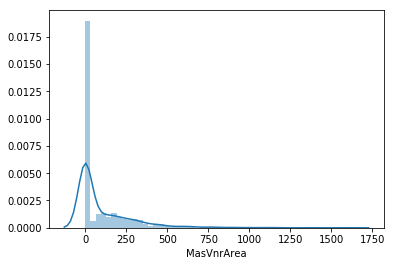

In [38]:
sns.distplot(train['MasVnrArea'])

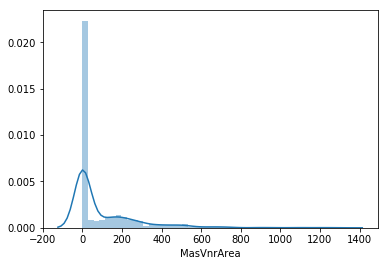

In [39]:
sns.distplot(test['MasVnrArea'])

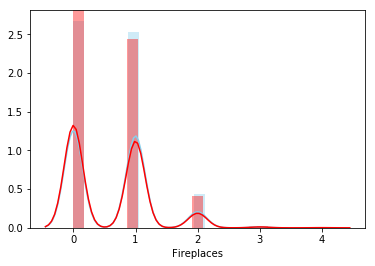

In [37]:
sns.distplot( train['Fireplaces'] , color="skyblue", label='LotFrontage')
sns.distplot( test['Fireplaces'] , color="red", label='LotFrontage')

In [58]:
def plot_2(col):
    fig, axs = plt.subplots(ncols=2, figsize=(16, 7))
    sns.distplot(train[str(col)] , color="skyblue", ax=axs[0])
    sns.distplot(test[str(col)] , color="olive", ax=axs[1])

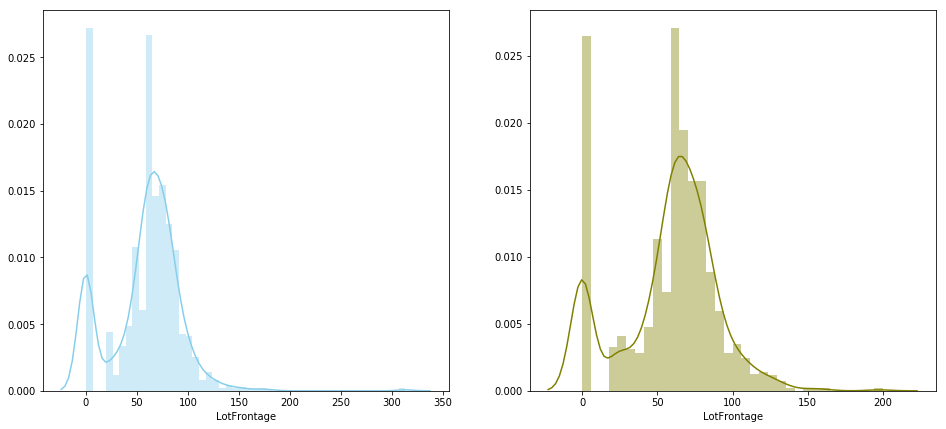

In [59]:
plot_2('LotFrontage')

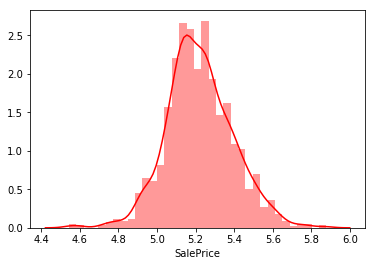

In [61]:
sns.distplot( np.log10(train['SalePrice']) , color="red", label='LotFrontage')

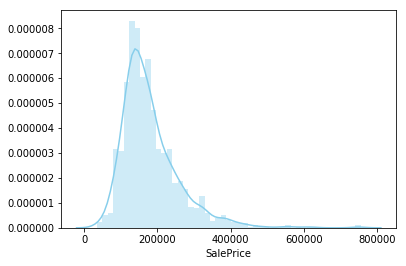

In [62]:
sns.distplot( train['SalePrice'] , color="skyblue", label='LotFrontage')

In [63]:
train['SalePrice'] = np.log10(train['SalePrice'])

In [65]:
ss = StandardScaler()

In [66]:
for col in num_col:
    train[col] = ss.fit_transform(train[col])
    test[col] = ss.fit_transform(test[col])

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

In [68]:
train.to_csv('data/pro_train.csv', sep = ',', index = False)
test.to_csv('data/pro_test.csv', sep = ',', index = False)